In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings('ignore')

from pathlib import Path 
data_path = Path('data')

%matplotlib  inline

In [2]:
data = pd.read_csv(data_path / 'house.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Creación de dos gráficos de linea en un mismo plot.

In [3]:
agrup = data.groupby('condition').agg({
    'sqft_living' : 'mean',
    'sqft_lot' : 'mean'
})
agrup

,sqft_living,sqft_lot
condition,,
1,1325.000000,19718.000000
2,1526.875000,39597.812500
3,2218.987478,14164.930783
4,1986.699681,15969.862620
5,2108.618391,14293.544828


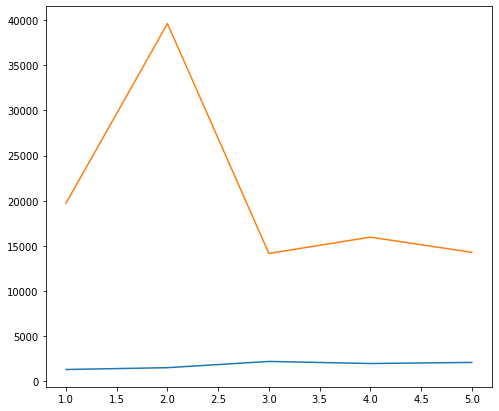

In [5]:
fig, ax = plt.subplots(figsize = (8,7))

ax.plot(agrup['sqft_living'], label='sqft_living')
ax.plot(agrup['sqft_lot'], label='sqft_lot')

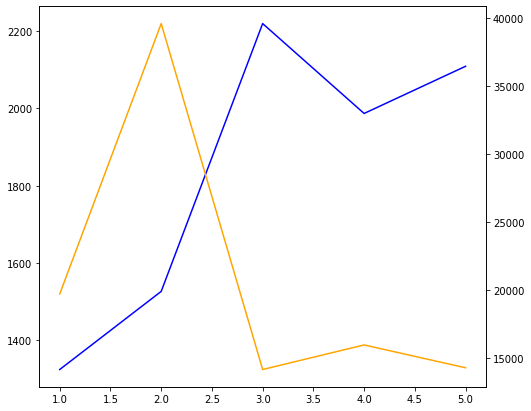

In [7]:
fig, ax = plt.subplots(figsize = (8,7))

ax.plot(agrup['sqft_living'], label='sqft_living', color='blue')
#Cambiamos los ejes para poder ver los valores en distintas escalas.
ax1 = ax.twinx()
ax1.plot(agrup['sqft_lot'], label='sqft_lot', color='orange')

In [8]:
cities = data.query('city in ("Seattle", "Renton", "Bellevue", "Redmond", "Issaquah")')

agr = cities.groupby(['city', 'condition'])['price'].mean().unstack().T
agr.fillna(0, inplace = True)
agr

city,Bellevue,Issaquah,Redmond,Renton,Seattle
condition,,,,,
1,365000.000000,0.000000,550000.000000,0.000000,341000.000000
2,0.000000,0.000000,170000.000000,427000.000000,427080.000000
3,964193.383451,619677.918680,690890.027797,411158.779352,543221.769090
4,713819.653623,517070.750000,598745.377841,307572.165123,592722.333256
5,818712.464286,587137.555556,825000.000000,342921.866667,721616.962702


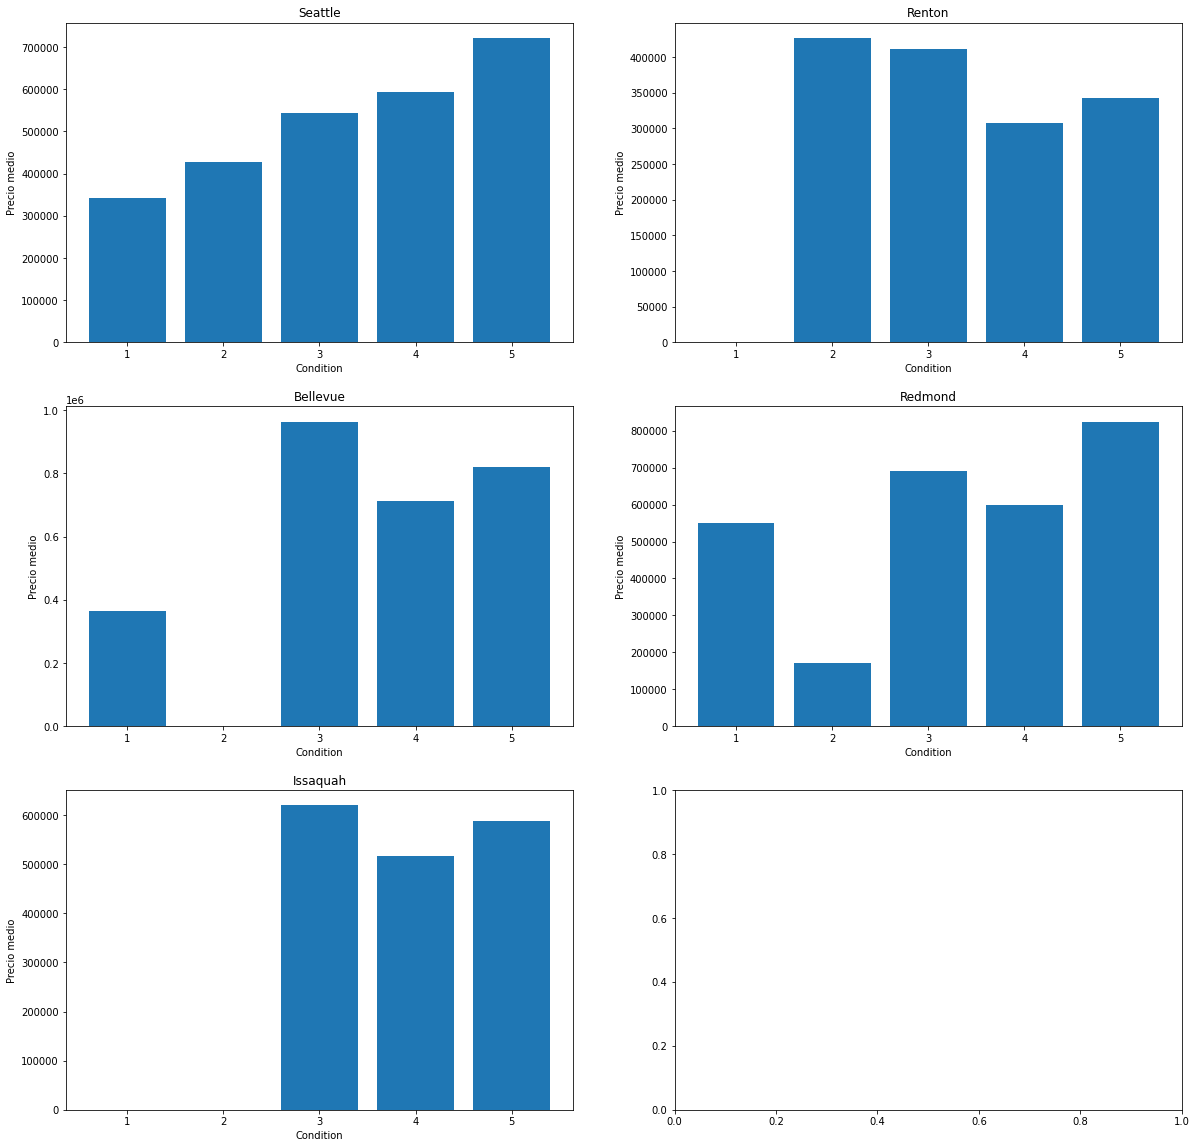

In [14]:
#Exponemos el numero de filas y columnas.
fig, ax = plt.subplots(nrows=3,ncols=2,figsize = (20,20))

cities = ["Seattle","Renton","Bellevue","Redmond","Issaquah"]

i,j = 0,0
for c in cities:
    ax[i,j].bar( x = agr.index, height=agr[c].values)
    ax[i,j].set_title(c)
    ax[i,j].set_xlabel('Condition')
    ax[i,j].set_ylabel('Precio medio')
    j+=1
    if j==2:
        j=0
        i+=1    